# Introduction to Autoregression and Autocorrelation for Time Series Forecasting

In [1]:
from statsmodels.datasets import co2, get_rdataset
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

## Overview of the Datasets

We will load the following datasets into a Pandas DataFrame. 

In [2]:
closing_price = pd.read_csv('closing_price.csv', index_col='Date', parse_dates=True)
co2_ts = co2.load_pandas().data
air_passengers = get_rdataset("AirPassengers")
air_passengers_ts = air_passengers.data

We will return the first 5 rows and the last 5 rows by using the Pandas head() and tail() functions.

In [3]:
closing_price.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,62.830273,140.552994,115.847458
2019-11-04,63.242901,141.364731,117.676682
2019-11-05,63.152027,141.276733,117.864746
2019-11-06,63.179031,140.885513,118.625488
2019-11-07,63.908203,141.081116,119.083855


In [4]:
closing_price.tail()

,AAPL,MSFT,IBM
Date,,,
2021-10-26,149.102402,309.543671,119.938713
2021-10-27,148.633087,322.579865,118.089584
2021-10-28,152.347656,323.757690,118.721680
2021-10-29,149.581696,331.014404,118.023544
2021-11-01,148.742920,328.768524,119.136795


In [5]:
co2_ts.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [6]:
co2_ts.tail()

,co2
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3
2001-12-29,371.5


In [7]:
air_passengers_ts.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [8]:
air_passengers_ts.tail()

,time,value
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


We will print information about the DataFrame including the index dtype and columns, non-null values and memory usage.

In [9]:
closing_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-11-01 to 2021-11-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    504 non-null    float64
 1   MSFT    504 non-null    float64
 2   IBM     504 non-null    float64
dtypes: float64(3)
memory usage: 15.8 KB


In [10]:
co2_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


In [11]:
air_passengers_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    144 non-null    float64
 1   value   144 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


We will pandas.DataFrame.isna function to detect missing values. 

In [12]:
closing_price.isna().sum()

AAPL    0
MSFT    0
IBM     0
dtype: int64

In [13]:
co2_ts.isna().sum()

co2    59
dtype: int64

In [14]:
air_passengers_ts.isna().sum()

time     0
value    0
dtype: int64

Since the co2_ts dataset has 59 missing values, we will use the pandas.DataFrame.ffill() function to fill missing values.

In [15]:
co2_ts = co2_ts.ffill()

We will use Pandas.DataFrame.index to check the index.

In [16]:
closing_price.index

DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14',
               ...
               '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
               '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
               '2021-10-29', '2021-11-01'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)

In [17]:
co2_ts.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [18]:
air_passengers_ts.index

RangeIndex(start=0, stop=144, step=1)

Since the frequency is set to None, we will update the frequency to daily.

In [19]:
closing_price.index.to_period("D")

PeriodIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
             '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
             '2019-11-13', '2019-11-14',
             ...
             '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
             '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
             '2021-10-29', '2021-11-01'],
            dtype='period[D]', name='Date', length=504)

Since the index is RangeIndex, we wiill update the index to a Date Time Index and set the frequency to monthly.

In [20]:
air_passengers_ts.index = pd.date_range('1949', '1961', freq='M')
air_passengers_ts.drop(columns=['time'], inplace=True)

<Axes: xlabel='Date'>

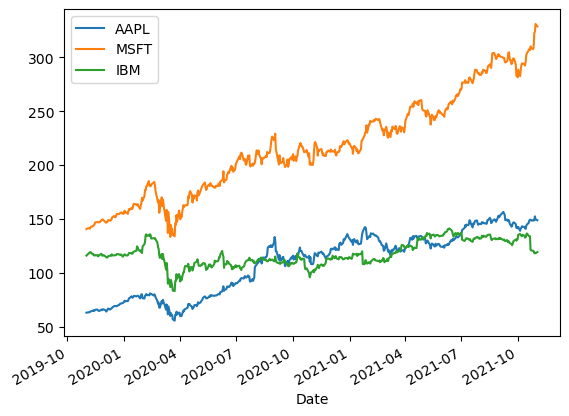

In [21]:
closing_price.plot()

<Axes: >

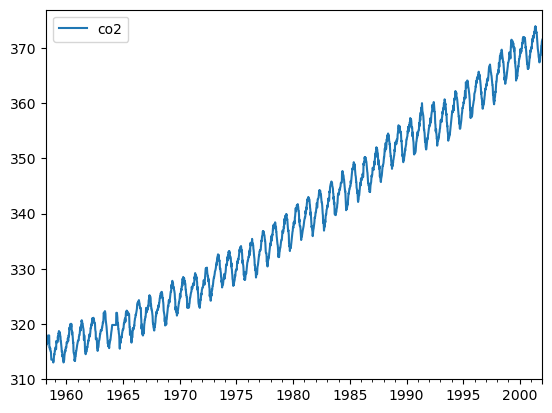

In [22]:
co2_ts.plot()

<Axes: >

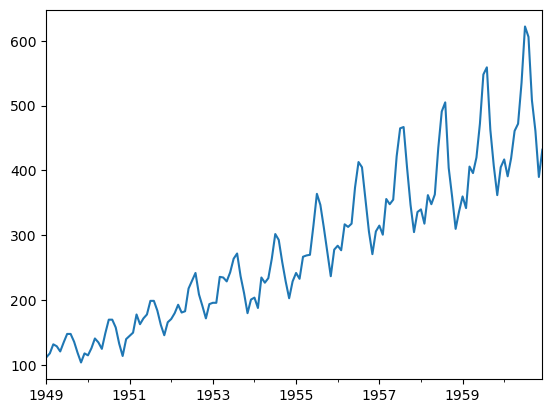

In [23]:
air_passengers_ts['value'].plot()

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

Since the seasonal components do not change over time, we will use an additive model.

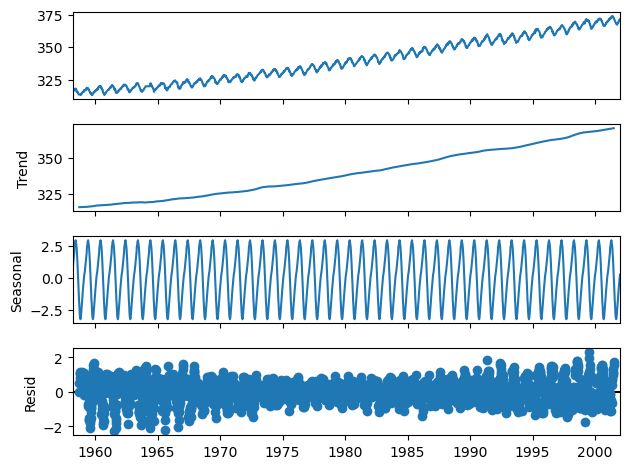

In [25]:
co2_decomposed = seasonal_decompose(co2_ts,model='additive')
co2_decomposed.plot(); 
plt.show()

Since the seasonal variations fluctuate over time, we will use a multiplicative model.

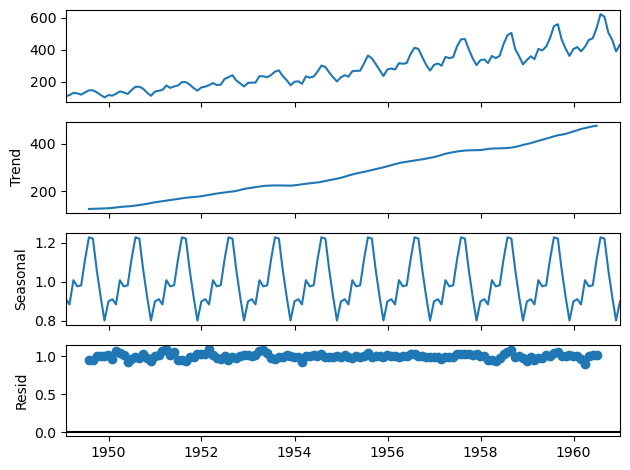

In [26]:
air_decomposed = seasonal_decompose(air_passengers_ts,model='multiplicative')
air_decomposed.plot(); 
plt.show()

<Axes: >

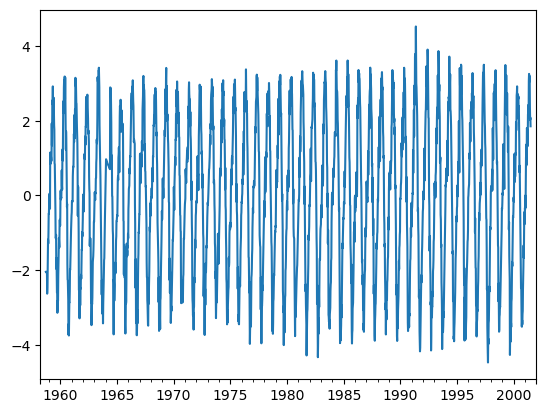

In [27]:
decomp = seasonal_decompose(co2_ts)
sd_detrend = decomp.observed - decomp.trend
sd_detrend.plot()

<Axes: >

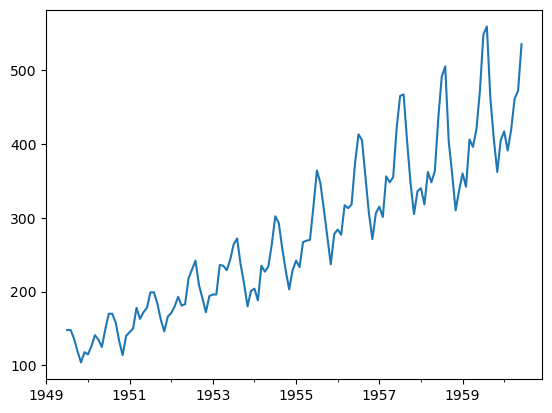

In [28]:
(air_decomposed.trend * air_decomposed.seasonal * air_decomposed.resid).plot() 

## Stationarity

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [30]:
def print_results(output, test='adf'): 
    pval = output[1] 
    test_score = output[0] 
    lags = output[2] 
    decision = 'Non-Stationary' 
    if test == 'adf': 
        critical = output[4] 
    if pval < 0.05: 
        decision = 'Stationary' 
    if pval >= 0.05: 
        decision = 'Non-Stationary' 
    output_dict = { 
        'Test Statistic': test_score, 
        'p-value': pval, 
        'Numbers of lags': lags, 
        'decision': decision } 
    for key, value in critical.items(): 
        output_dict["Critical Value (%s)" % key] = value 
    return pd.Series(output_dict, name=test) 

In [31]:
closing_price_adf_output = adfuller(closing_price['MSFT'])
pd.concat([
    print_results(closing_price_adf_output, 'adf'),
], axis=1)

,adf
Test Statistic,0.296851
p-value,0.9772
Numbers of lags,13
decision,Non-Stationary
Critical Value (1%),-3.443766
Critical Value (5%),-2.867457
Critical Value (10%),-2.569921


In [32]:
co2_ts_adf_output = adfuller(co2_ts)
pd.concat([
    print_results(co2_ts_adf_output, 'adf'),
], axis=1)

,adf
Test Statistic,0.046051
p-value,0.962179
Numbers of lags,27
decision,Non-Stationary
Critical Value (1%),-3.433252
Critical Value (5%),-2.862822
Critical Value (10%),-2.567452


In [33]:
air_passengers_ts_adf_output = adfuller(air_passengers_ts)
pd.concat([
    print_results(air_passengers_ts_adf_output, 'adf'),
], axis=1)

,adf
Test Statistic,0.815369
p-value,0.99188
Numbers of lags,13
decision,Non-Stationary
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.57877


## Autocorrelation

We will create a lag plot. Lag plots are used to check if a data set or time series is random. 

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

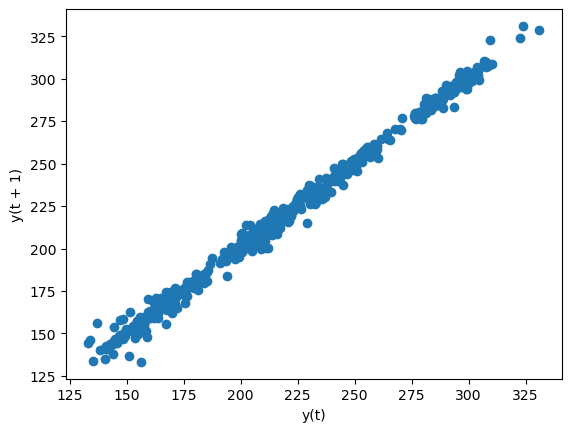

In [34]:
# Pass the lag argument and plot the values
pd.plotting.lag_plot(closing_price['MSFT'])

We can see that all observations along a diagonal line of the plot. It clearly shows a relationship or some correlation.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

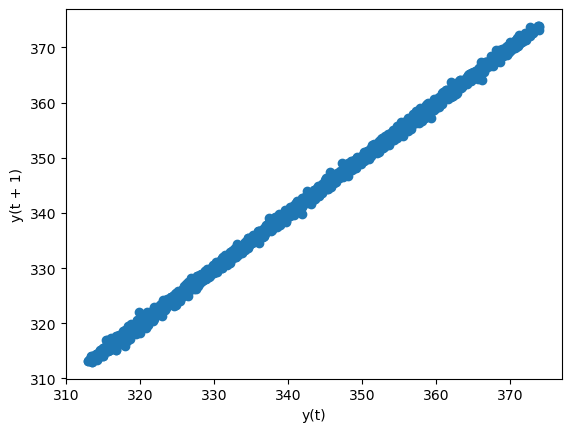

In [35]:
# Pass the lag argument and plot the values
pd.plotting.lag_plot(co2_ts)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

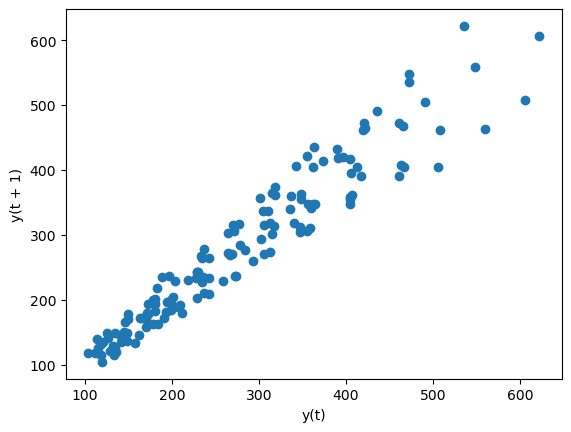

In [36]:
# Pass the lag argument and plot the values
pd.plotting.lag_plot(air_passengers_ts)

We can use the Pandas DataFrame shift( ) method to shift the index by the desired number of periods.

In [37]:
values = pd.DataFrame(closing_price['MSFT'].values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
result

,t-1,t+1
t-1,1.000000,0.996438
t+1,0.996438,1.000000


It shows a strong correlation (0.99) at lag 1.

In [38]:
values = pd.DataFrame(co2_ts.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
result

,t-1,t+1
t-1,1.000000,0.999579
t+1,0.999579,1.000000


It shows a strong correlation (0.99) at lag 1.

In [39]:
values = pd.DataFrame(air_passengers_ts.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
result

,t-1,t+1
t-1,1.000000,0.960195
t+1,0.960195,1.000000


It shows a strong correlation (0.96) at lag 1.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

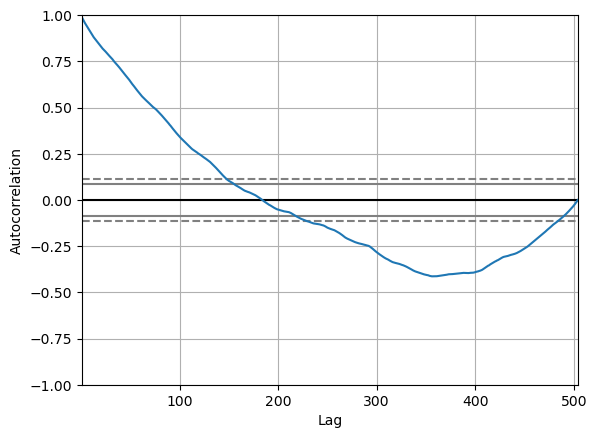

In [40]:
# Pass the autocorrelation argument and plot the values
pd.plotting.autocorrelation_plot(closing_price['MSFT'])

The autocorrelation plot shows the value of the autocorrelation function on the vertical axis. It can range from –1 to 1. The horizontal lines displayed in the plot correspond to 95 percent and 99 percent confidence bands, and the dashed line is 99 percent confidence band. The autocorrelation plot is intended to reveal whether the data points of a time series are positively correlated, negatively correlated, or independent of each other.

A plot of the autocorrelation of a time series by lag is also called the autocorrelation function (ACF). Python supports the ACF with the plot_acf() from the statsmodels library. Since the data is non-stationary due to the presence of a long-term trend, we will need to difference (detrend) the time series to make it stationary before applying the ACF and PACF plots.

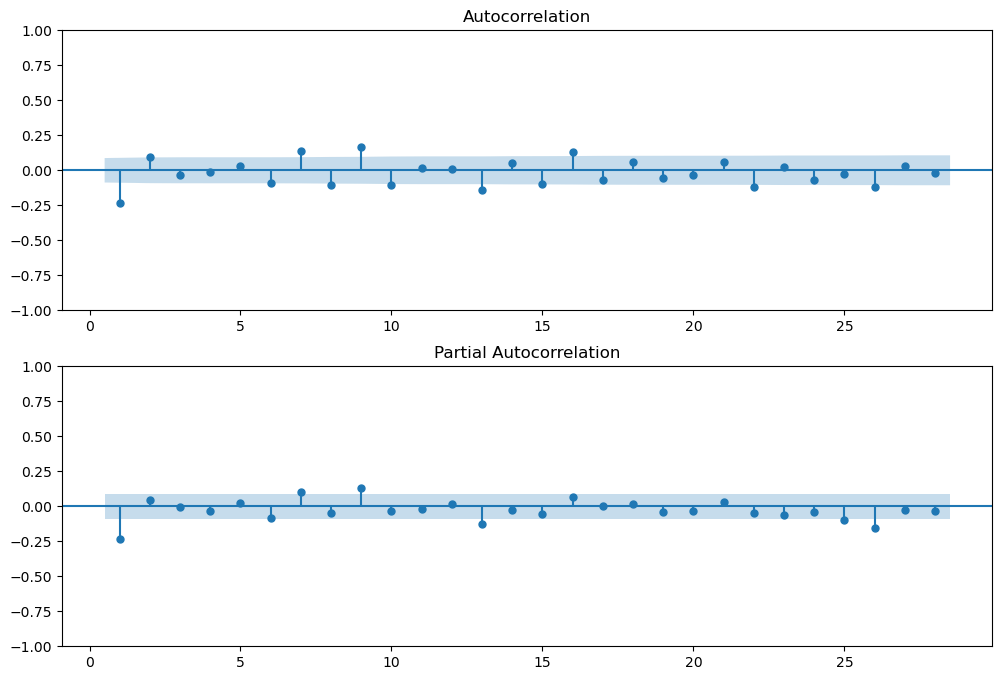

In [41]:
# Differencing
closing_price_diff = closing_price['MSFT'].diff().dropna()
fig, ax = plt.subplots(2,1, figsize=(12,8))
# create the plots without the zero lag
plot_acf(closing_price_diff, zero=False, ax=ax[0])
plot_pacf(closing_price_diff, zero=False, ax=ax[1])
plt.show() 

The ACF plot shows a significant spike at lag (order) 1. When a lag goes above or below the shaded area, then it is significant. The shaded area represents the confidence interval, which is set to 95 % by default. In the ACF plot, the first lag is significant. Perhaps 7th and the 9th are also significant. All the remaining lags are not significant. This indicates a moving average of order 1. 

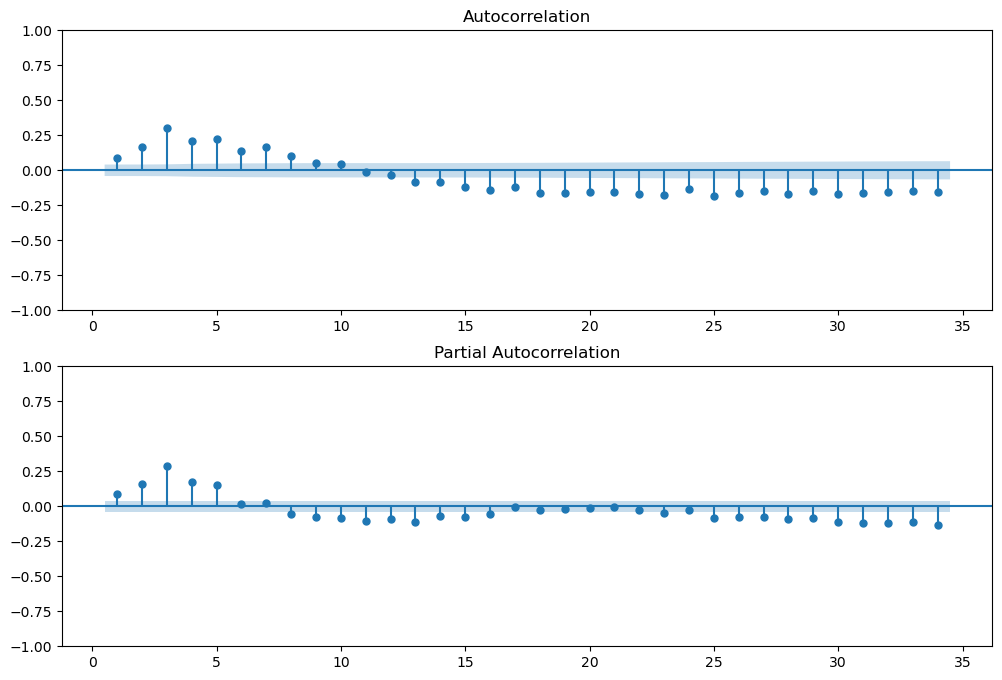

In [42]:
# Differencing
co2_ts_diff = co2_ts.diff().dropna()
fig, ax = plt.subplots(2,1, figsize=(12,8))
# create the plots without the zero lag
plot_acf(co2_ts_diff, zero=False, ax=ax[0])
plot_pacf(co2_ts_diff, zero=False, ax=ax[1])
plt.show() 

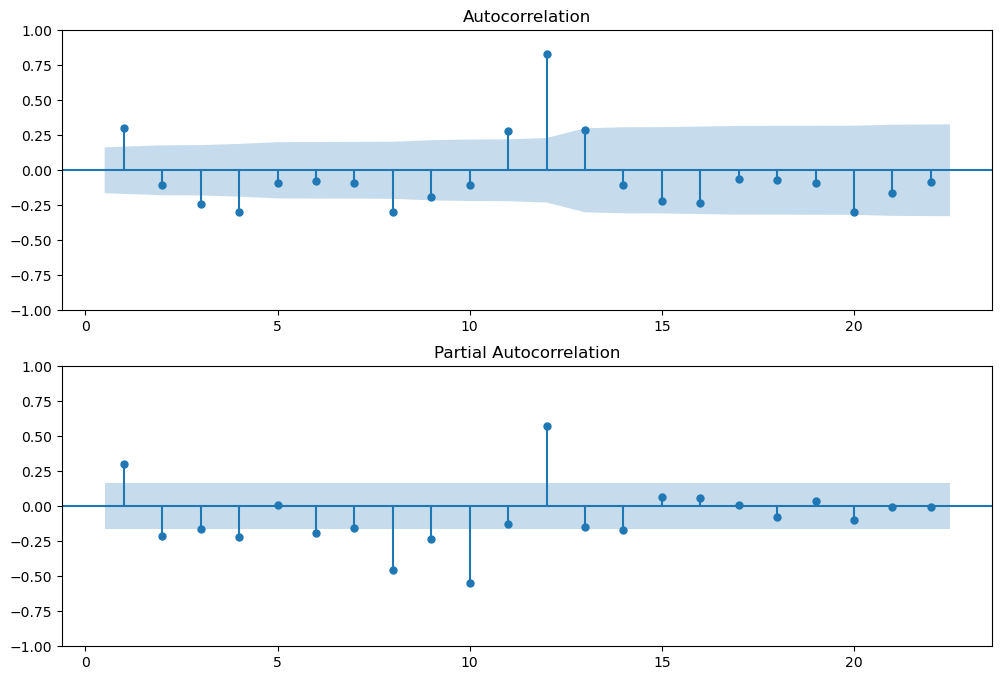

In [43]:
# Differencing
air_passengers_ts_diff = air_passengers_ts.diff().dropna()
fig, ax = plt.subplots(2,1, figsize=(12,8))
# create the plots without the zero lag
plot_acf(air_passengers_ts_diff, zero=False, ax=ax[0])
plot_pacf(air_passengers_ts_diff, zero=False, ax=ax[1])
plt.show() 

Another way to test for autocorrelation in time series data is the Ljung-Box Test. This test checks for autocorrelation up to a specified lag and checks whether they are significantly far off from 0. The null hypothesis states that the previous lags are not correlated with the current period. In other words, we test for the absence of autocorrelation. If the data is not stationary, we will need to perform log transform (log differencing).

In [44]:
closing_price_diff= np.log(closing_price['MSFT']).diff().dropna()

When running the test using acorr_ljungbox from statsmodels library, we need to provide a lag value. The test will run for all lags up to the specified lag. We will start with lag 10.

In [45]:
acorr_ljungbox(closing_price_diff, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,61.227320,5.085098e-15
2,72.473612,1.830439e-16
3,72.497900,1.245246e-15
4,73.361600,4.424366e-15
5,75.927499,5.956820e-15
6,88.846443,5.259885e-17
7,112.378394,2.946463e-21
8,133.630679,4.995573e-25
9,161.755641,3.205778e-30
10,170.689136,1.997141e-31


The test statistic for all lags up to lag 10 is significant, because the p-value is less than 0.05. We can reject the null hypothesis. Therefore, the time series exhibits autocorrelation.

In [46]:
co2_diff= np.log(co2_ts).diff().dropna()
acorr_ljungbox(co2_diff, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,16.193898,5.717801e-05
2,78.485798,9.057856e-18
3,287.050787,6.311581e-62
4,383.291716,1.132455e-81
5,493.588582,1.932434e-104
6,536.683057,1.047943e-112
7,598.257880,5.776363e-125
8,620.615981,8.637442e-129
9,626.775866,3.739862e-129
10,631.630413,2.925751e-129


## Autoregression

In [47]:
max_order = 9
best_order = None
best_mse = np.inf

tscv = TimeSeriesSplit(n_splits=5)  
for p in range(1, max_order + 1):
    mse_scores = []
    
    for train_index, test_index in tscv.split(air_passengers_ts['value']):
        train_data, test_data = air_passengers_ts['value'][train_index], air_passengers_ts['value'][test_index]
        
        model = AutoReg(train_data, lags=p)
        result = model.fit()
        predictions = result.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
        
        mse = mean_squared_error(test_data, predictions)
        mse_scores.append(mse)
    
    avg_mse = np.mean(mse_scores)

    if avg_mse < best_mse:
        best_mse = avg_mse
        best_order = p

print("Best Lag Order (p):", best_order)

Best Lag Order (p): 9


In [48]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  value   No. Observations:                  120
Model:                     AutoReg(9)   Log Likelihood                -498.089
Method:               Conditional MLE   S.D. of innovations             21.506
Date:                Wed, 21 Feb 2024   AIC                           1018.178
Time:                        21:40:56   BIC                           1047.983
Sample:                    10-31-1949   HQIC                          1030.269
                         - 12-31-1958                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4825      6.395      1.014      0.311      -6.051      19.016
value.L1       1.1786      0.081     14.532      0.000       1.020       1.338
value.L2      -0.5098      0.132     -3.856      0.000      -0.769      -0.251
value.L3       0.2469      0.142      1.739      0.082      -0.031       0.525
value.L4      -0.4920      0.148     -3.316      0.001      -0.783      -0.201
value.L5       0.6038      0.153      3.957      0.000       0.305       0.903
value.L6      -0.3034      0.152     -1.990      0.047      -0.602      -0.005
value.L7       0.2443      0.152      1.605      0.108      -0.054       0.542
value.L8      -0.5678      0.146     -3.885      0.000      -0.854      -0.281
value.L9       0.5992      0.091      6.550      0.000       0.420       0.778
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9339           -0.5508j            1.0842           -0.4152
AR.2           -0.9339           +0.5508j            1.0842            0.4152
AR.3           -0.4300           -1.0148j            1.1022           -0.3138
AR.4           -0.4300           +1.0148j            1.1022            0.3138
AR.5            0.4506           -0.9376j            1.0403           -0.1787
AR.6            0.4506           +0.9376j            1.0403            0.1787
AR.7            1.0002           -0.0000j            1.0002           -0.0000
AR.8            0.8870           -0.5414j            1.0392           -0.0872
AR.9            0.8870           +0.5414j            1.0392            0.0872
-----------------------------------------------------------------------------
"""

In [49]:
print('Coefficients: %s' % result.params)

Coefficients: const       6.482514
value.L1    1.178586
value.L2   -0.509800
value.L3    0.246850
value.L4   -0.491996
value.L5    0.603791
value.L6   -0.303404
value.L7    0.244255
value.L8   -0.567843
value.L9    0.599152
dtype: float64


In [50]:
# make predictions
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test_data[i]))

predicted=400.052421, expected=360.000000
predicted=387.194998, expected=342.000000
predicted=388.902607, expected=406.000000
predicted=384.750933, expected=396.000000
predicted=430.709878, expected=420.000000
predicted=476.688881, expected=472.000000
predicted=486.147997, expected=548.000000
predicted=462.886505, expected=559.000000
predicted=393.594805, expected=463.000000
predicted=378.006140, expected=407.000000
predicted=388.692814, expected=362.000000
predicted=409.942395, expected=405.000000
predicted=425.512573, expected=417.000000
predicted=412.295832, expected=391.000000
predicted=416.875256, expected=419.000000
predicted=435.532868, expected=461.000000
predicted=475.454799, expected=472.000000
predicted=493.527386, expected=535.000000
predicted=473.905618, expected=622.000000
predicted=447.156178, expected=606.000000
predicted=420.990590, expected=508.000000
predicted=426.449985, expected=461.000000
predicted=442.111850, expected=390.000000
predicted=449.058701, expected=432

In [51]:
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 59.689


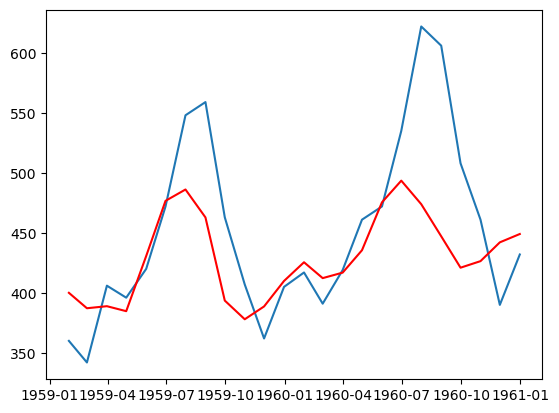

In [52]:
# plot results
plt.plot(test_data)
plt.plot(predictions, color='red')
plt.show()

In [53]:
residuals = result.resid
acorr_ljungbox(residuals,lags=10,return_df=True)

,lb_stat,lb_pvalue
1,2.057432,1.514653e-01
2,17.537211,1.555403e-04
3,17.776999,4.889705e-04
4,27.806994,1.364822e-05
5,28.028004,3.594283e-05
6,32.680561,1.207899e-05
7,33.262811,2.365227e-05
8,39.480907,4.001736e-06
9,39.732429,8.495245e-06
10,61.342257,2.017640e-09
